Data:https://www.kaggle.com/paulbrabban/daily-minimum-temperatures-in-melbourne; Tutorial:https://www.bilibili.com/video/BV1Kt411u7fS?p=2

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# set plot size
plt.style.use({'figure.figsize':(25,20)})

plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号

In [141]:
df = pd.read_csv("DailyMinTemp_Mel.csv")
df.tail()

,Date,Daily minimum temperatures in Melbourne
3645,12/27/1990,14.0
3646,12/28/1990,13.6
3647,12/29/1990,13.5
3648,12/30/1990,15.7
3649,12/31/1990,13.0


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     3650 non-null   object 
 1   Daily minimum temperatures in Melbourne  3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [143]:
df['Date']=pd.to_datetime(df['Date'])
df=df.set_index('Date')

In [144]:
df=df.rename(columns={"Daily minimum temperatures in Melbourne": "MinTemperature"})

In [145]:
print(df.dtypes)

MinTemperature    float64
dtype: object


In [146]:
df['MinTemperature'] = pd.to_numeric(df['MinTemperature'], errors='coerce')

In [147]:
df.shape

(3650, 1)

In [148]:
df.describe()

,MinTemperature
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


#### Line Chart

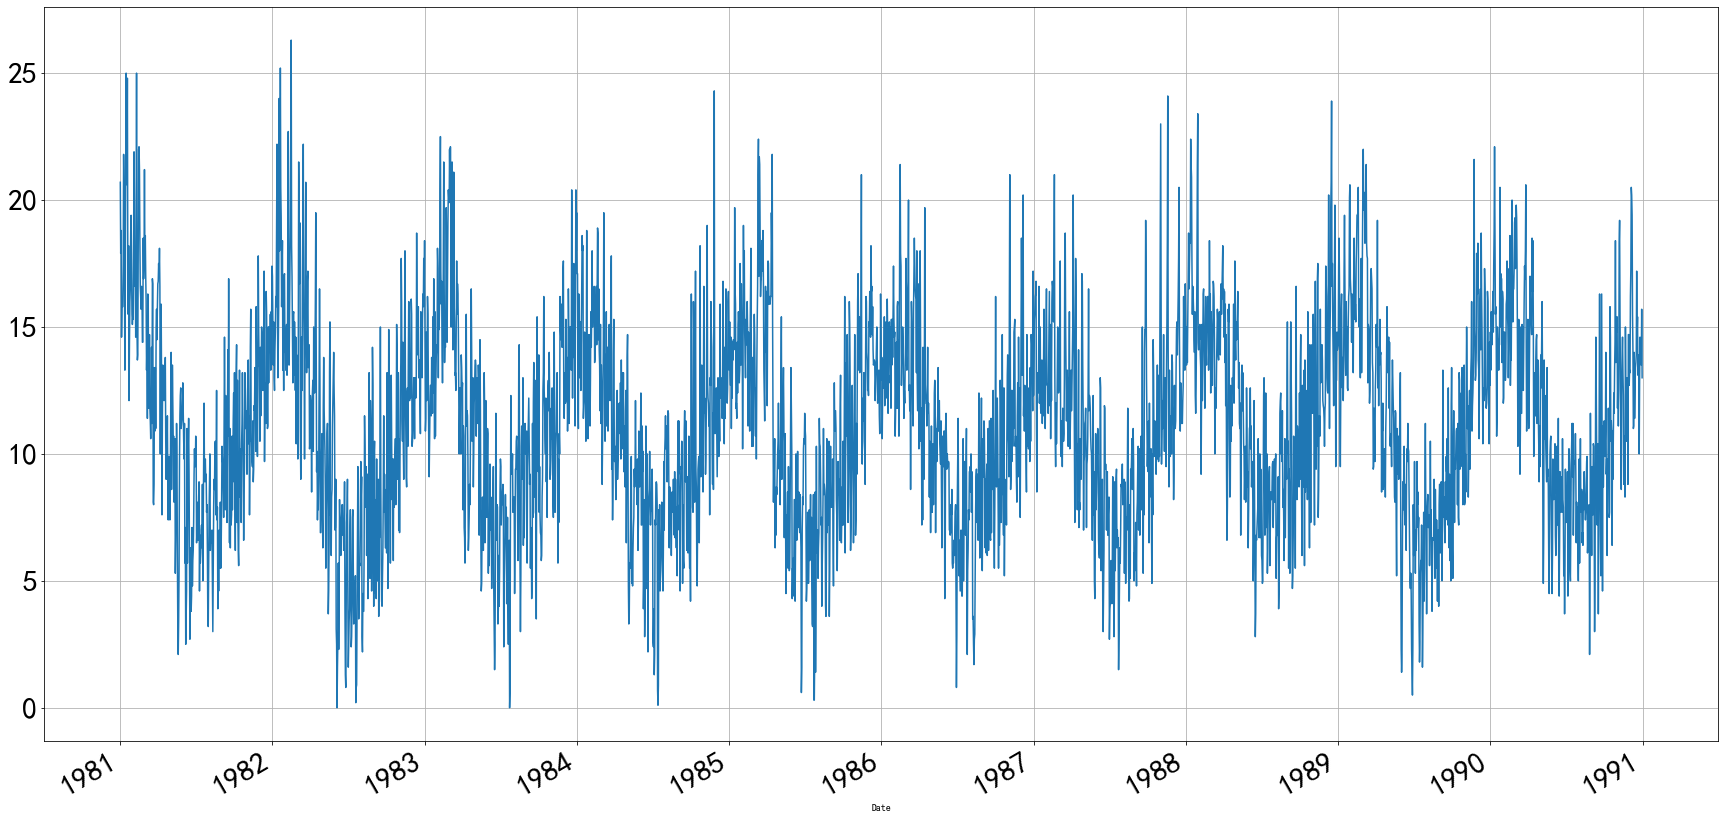

In [149]:
df['MinTemperature'].plot(figsize=(30,15))

plt.tick_params(labelsize=30)
plt.grid()

#### Scattor Plat

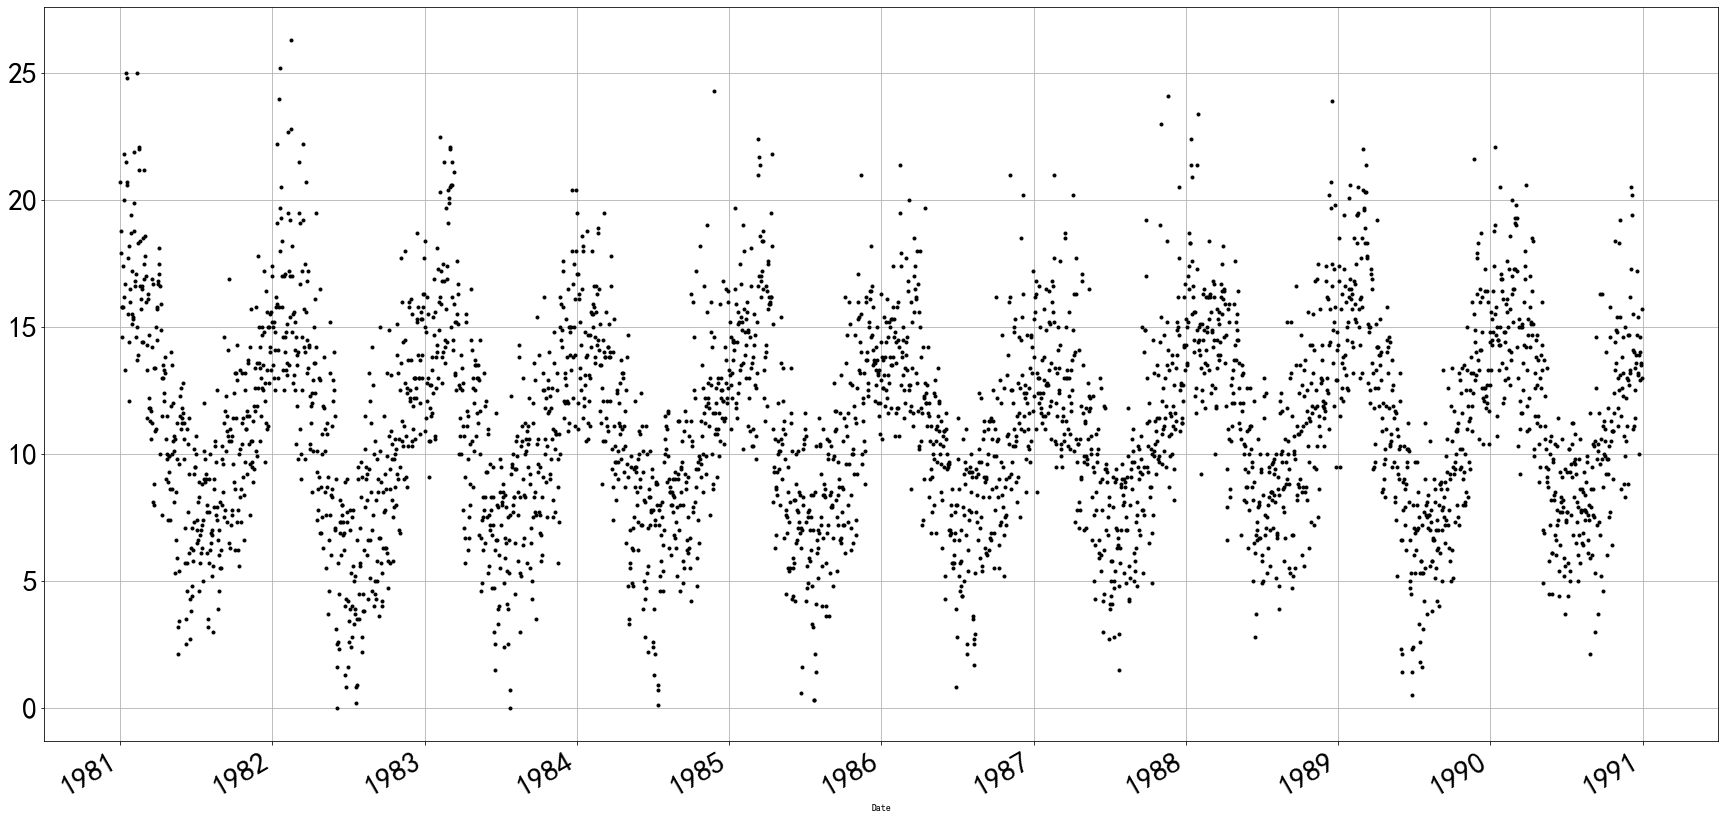

In [150]:
df['MinTemperature'].plot(style='k.',figsize=(30,15))
plt.tick_params(labelsize=30)
plt.grid()

#### Histogram

<AxesSubplot:ylabel='Frequency'>

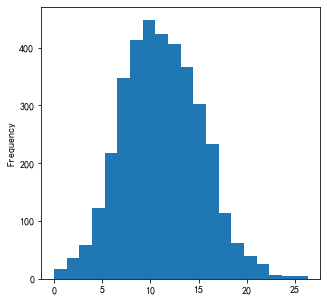

In [151]:
plt.style.use({'figure.figsize':(5,5)})
df['MinTemperature'].plot(kind='hist',bins=20)

<AxesSubplot:ylabel='Frequency'>

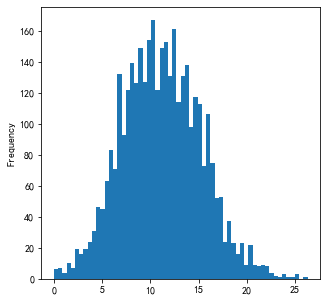

In [152]:
df['MinTemperature'].plot(kind='hist',bins=60)

#### 堆积面积图

<AxesSubplot:xlabel='Date'>

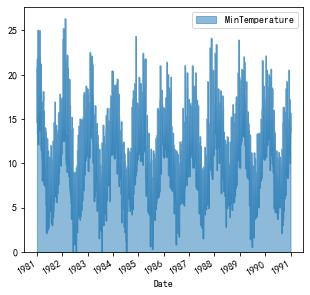

In [53]:
df.plot.area(stacked=False)

#### 概率密度图

<AxesSubplot:ylabel='Density'>

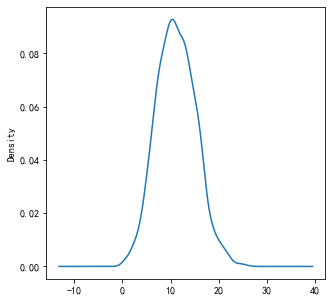

In [54]:
df['MinTemperature'].plot(kind='kde')

#### 热力图

In [61]:
import seaborn as sns
plt.style.use({'figure.figsize':(20,8)})
df['1982'].resample('M').mean().T

Date,1982-01-31,1982-02-28,1982-03-31,1982-04-30,1982-05-31,1982-06-30,1982-07-31,1982-08-31,1982-09-30,1982-10-31,1982-11-30,1982-12-31
MinTemperature,16.567742,15.921429,14.935484,11.47,9.583871,5.606667,4.927586,7.903226,7.28,9.545161,12.486667,13.754839


<AxesSubplot:xlabel='Date'>

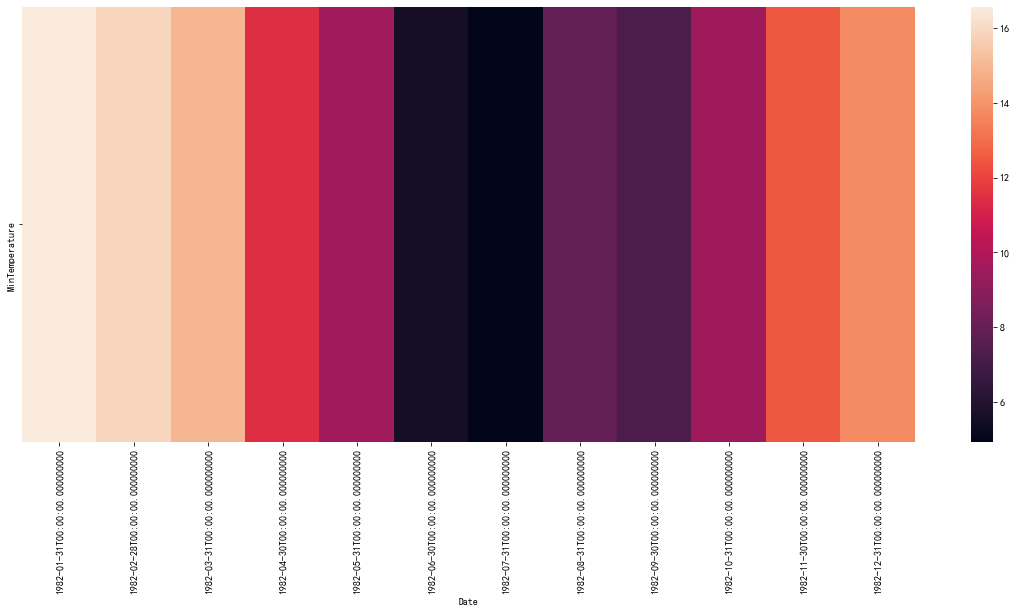

In [63]:
sns.heatmap(df['1982'].resample('M').mean().T)
# 颜色越深，温度越低

In [64]:
# 筛选指定日期的数据
df['1986']

,MinTemperature
Date,
1986-01-01,12.9
1986-01-02,13.8
1986-01-03,10.6
1986-01-04,12.6
1986-01-05,13.7
...,...
1986-12-27,14.6
1986-12-28,14.2
1986-12-29,13.2


In [66]:
# 将每年和每天的温度筛选出来
groups=df.groupby(pd.Grouper(freq='1Y'))['MinTemperature']
groups

In [75]:
#制成矩阵
from pandas import DataFrame
years=DataFrame()
for name,group in groups:
    years[name.year]=group.values

In [68]:
years

,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990
0,20.7,17.0,18.4,19.5,13.3,12.9,12.3,15.3,14.3,14.8
1,17.9,15.0,15.0,17.1,15.2,13.8,13.8,14.3,17.4,13.3
2,18.8,13.5,10.9,17.1,13.1,10.6,15.3,13.5,18.5,15.6
3,14.6,15.2,11.4,12.0,12.7,12.6,15.6,15.0,16.8,14.5
4,15.8,13.0,14.8,11.0,14.6,13.7,16.2,13.6,11.5,14.3
...,...,...,...,...,...,...,...,...,...,...
360,15.5,15.3,13.9,12.2,11.5,14.6,16.2,9.5,13.3,14.0
361,13.3,16.3,11.1,12.0,10.8,14.2,14.2,12.9,11.7,13.6
362,15.6,15.8,16.1,12.6,12.0,13.2,14.3,12.9,10.4,13.5
363,15.2,17.7,20.4,16.0,16.3,11.7,13.3,14.8,14.4,15.7


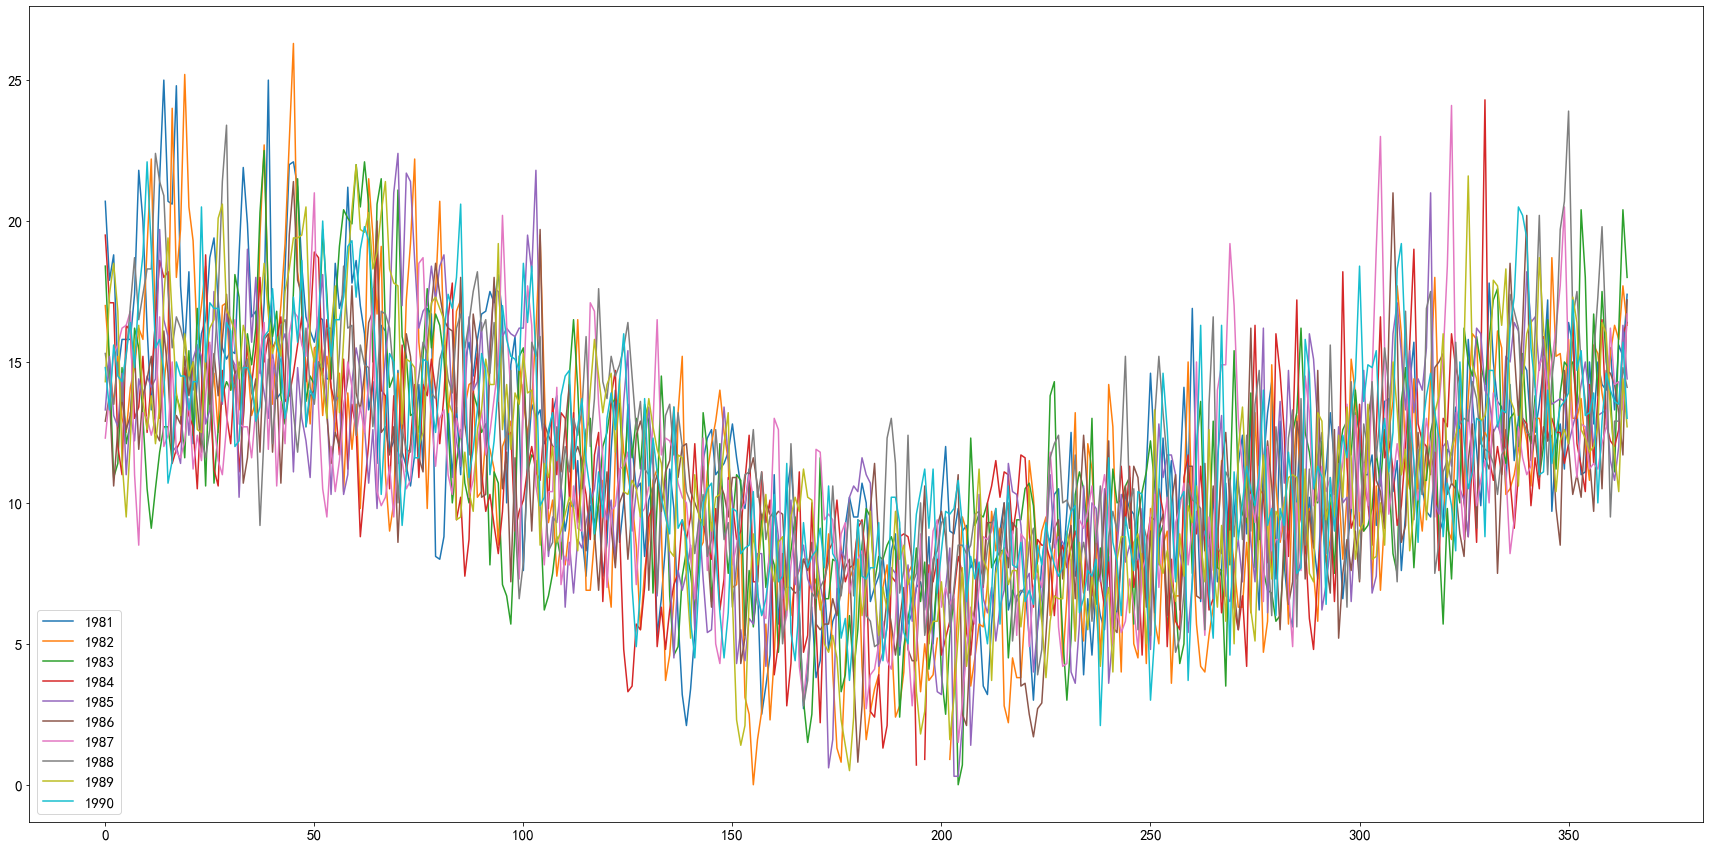

In [76]:
plt.style.use({'figure.figsize':(30,15)})
years.plot()
plt.legend(fontsize=15,markerscale=15)
plt.tick_params(labelsize=15)

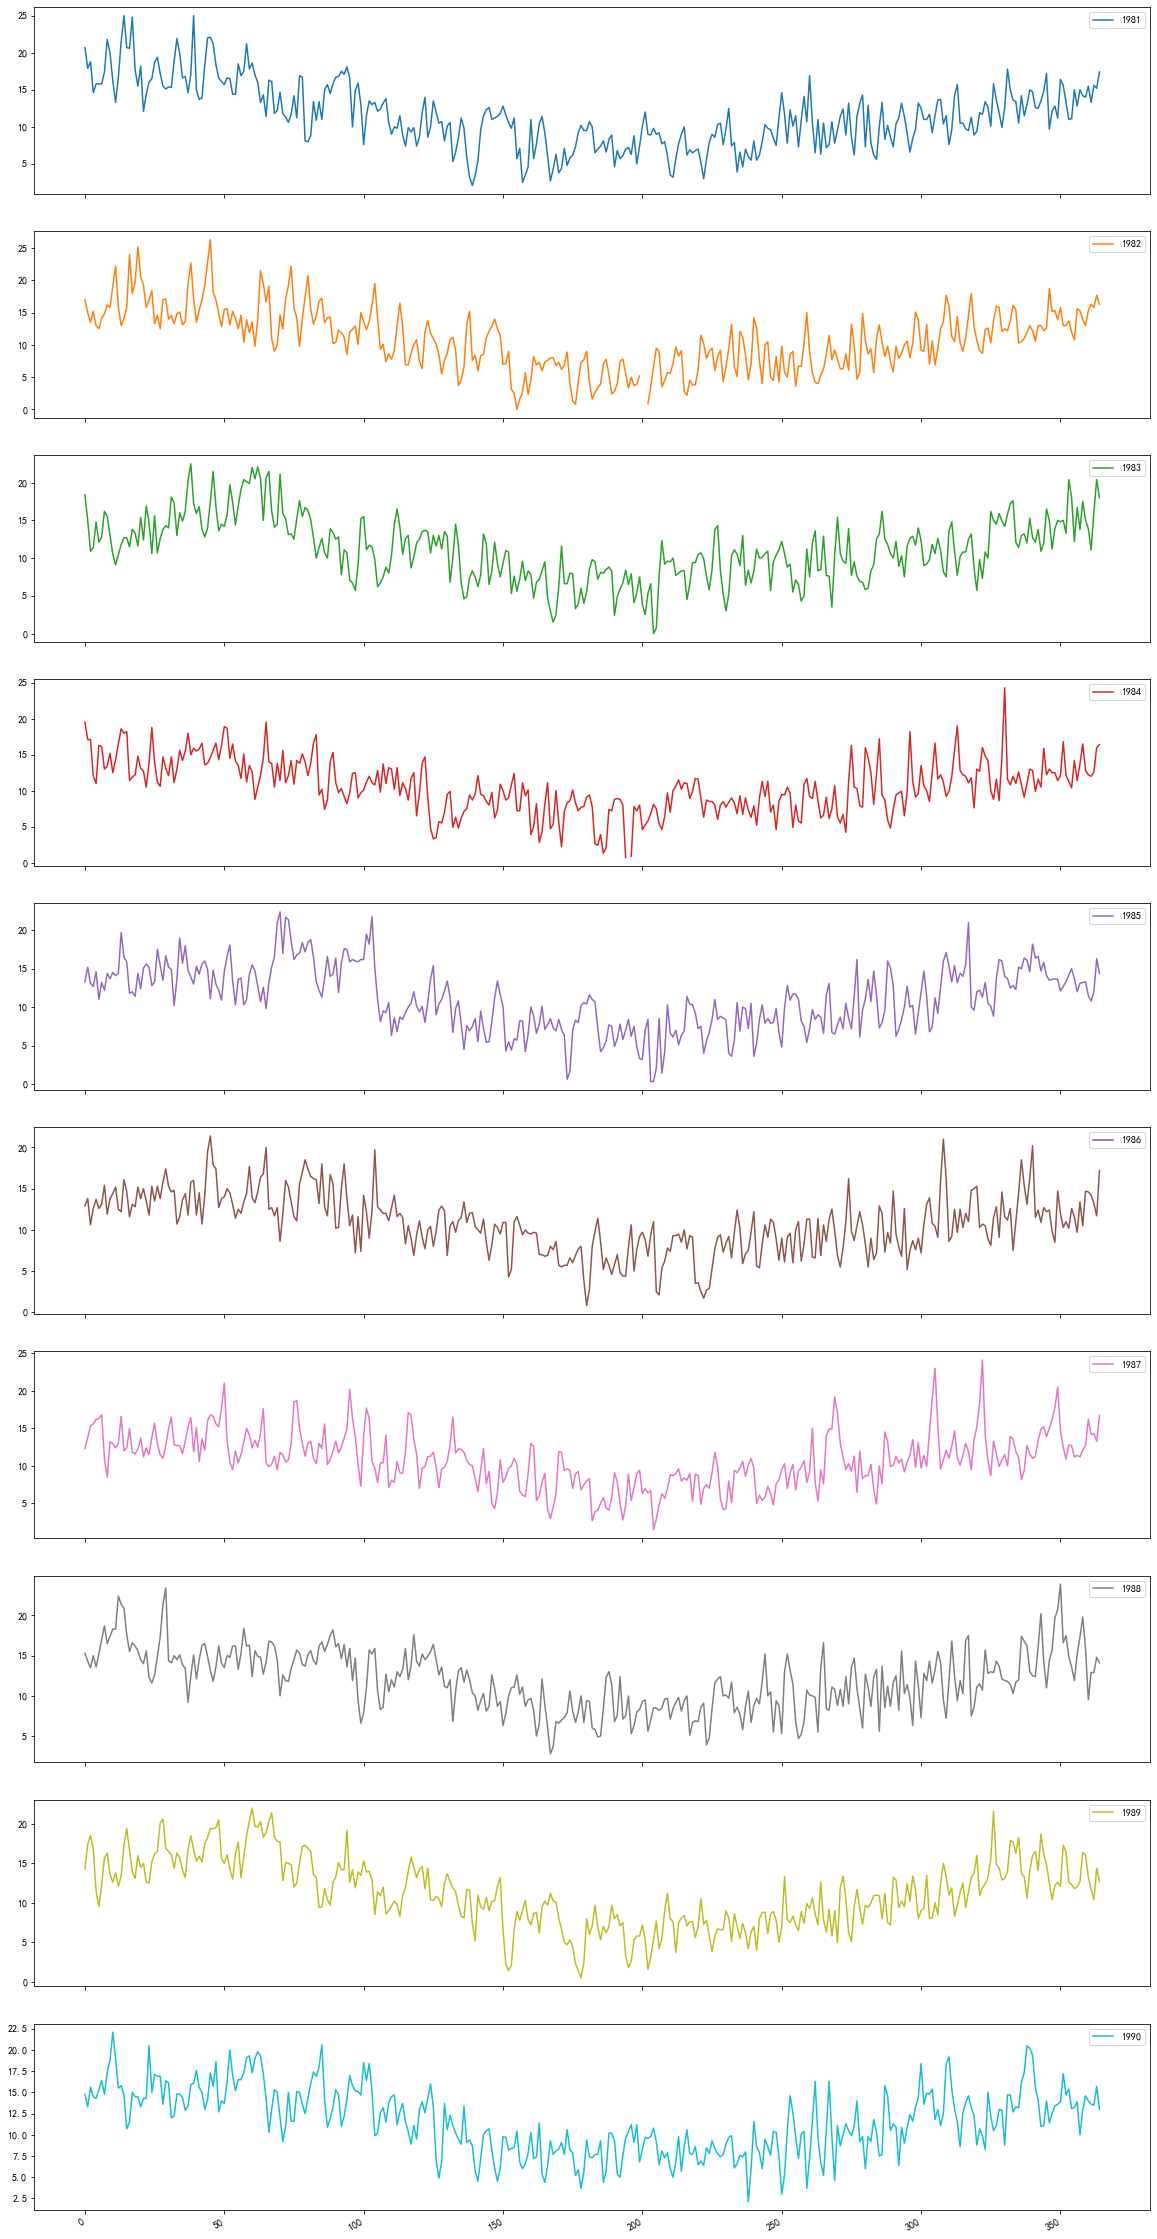

In [77]:
# 绘制子图
years.plot(subplots=True,figsize=(20,45))
plt.show()

#### 箱型图

<AxesSubplot:>

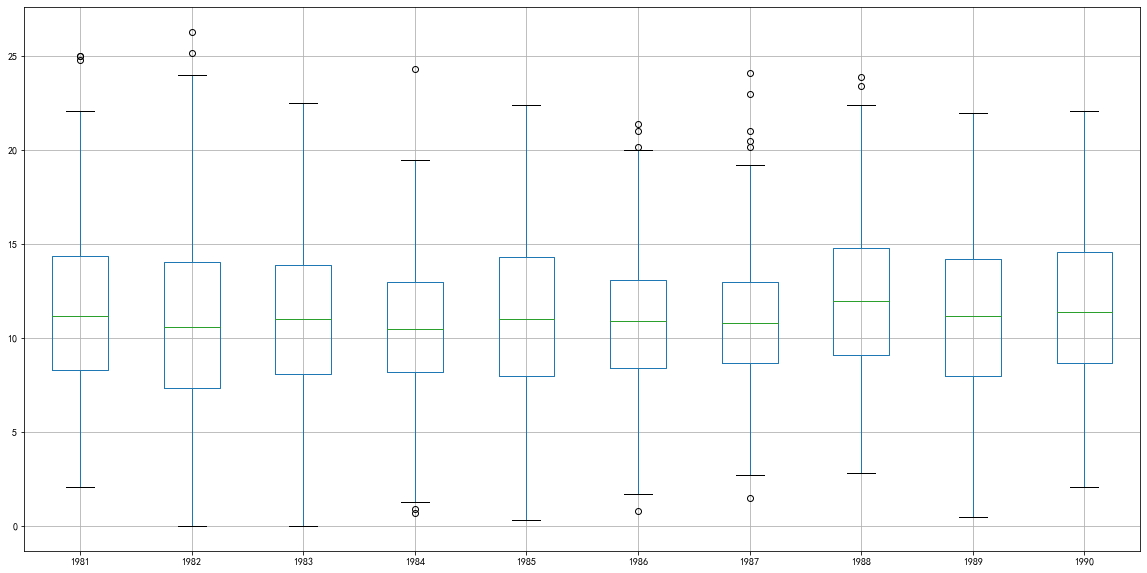

In [78]:
years.boxplot(figsize=(20,10))

#### 热力图

<AxesSubplot:>

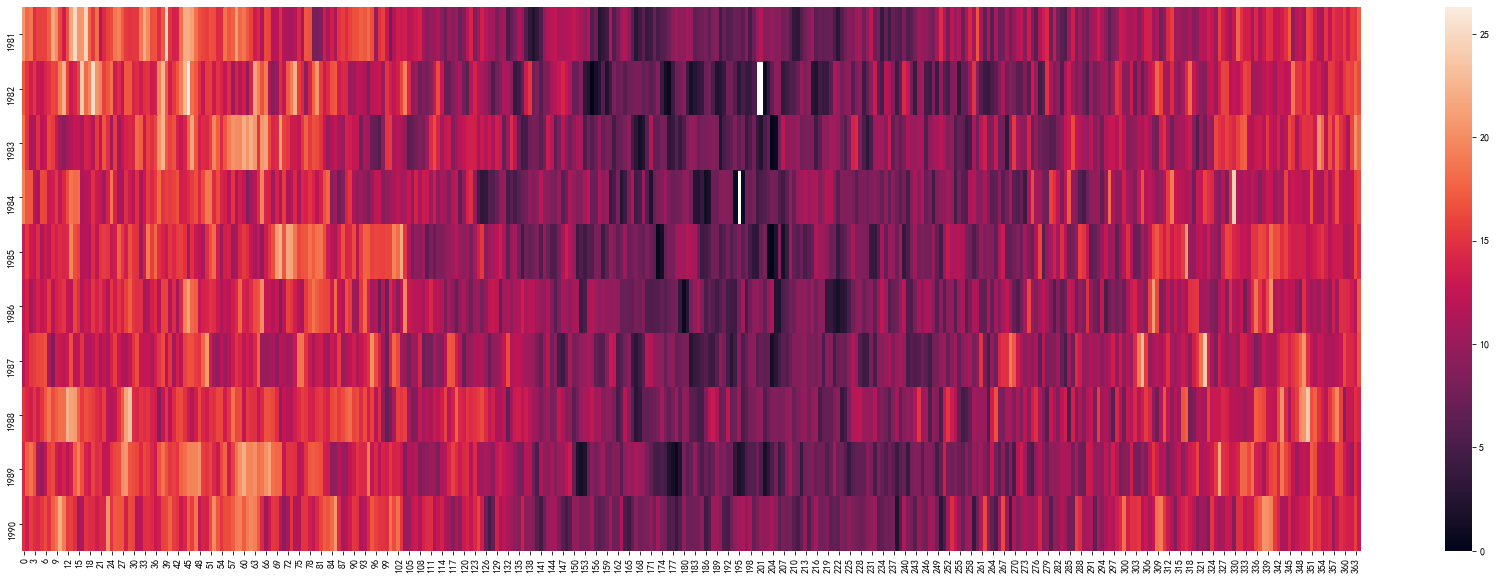

In [79]:
plt.style.use({'figure.figsize':(30,10)})
sns.heatmap(years.T)
# 颜色越深，温度越低

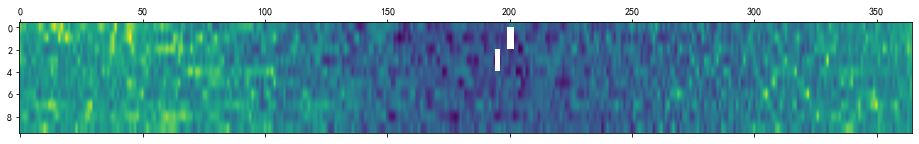

In [80]:
plt.matshow(years.T,interpolation=None,aspect='auto')

#### 每年气温直方图

array([[<AxesSubplot:title={'center':'1981'}>,
        <AxesSubplot:title={'center':'1982'}>,
        <AxesSubplot:title={'center':'1983'}>],
       [<AxesSubplot:title={'center':'1984'}>,
        <AxesSubplot:title={'center':'1985'}>,
        <AxesSubplot:title={'center':'1986'}>],
       [<AxesSubplot:title={'center':'1987'}>,
        <AxesSubplot:title={'center':'1988'}>,
        <AxesSubplot:title={'center':'1989'}>],
       [<AxesSubplot:title={'center':'1990'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

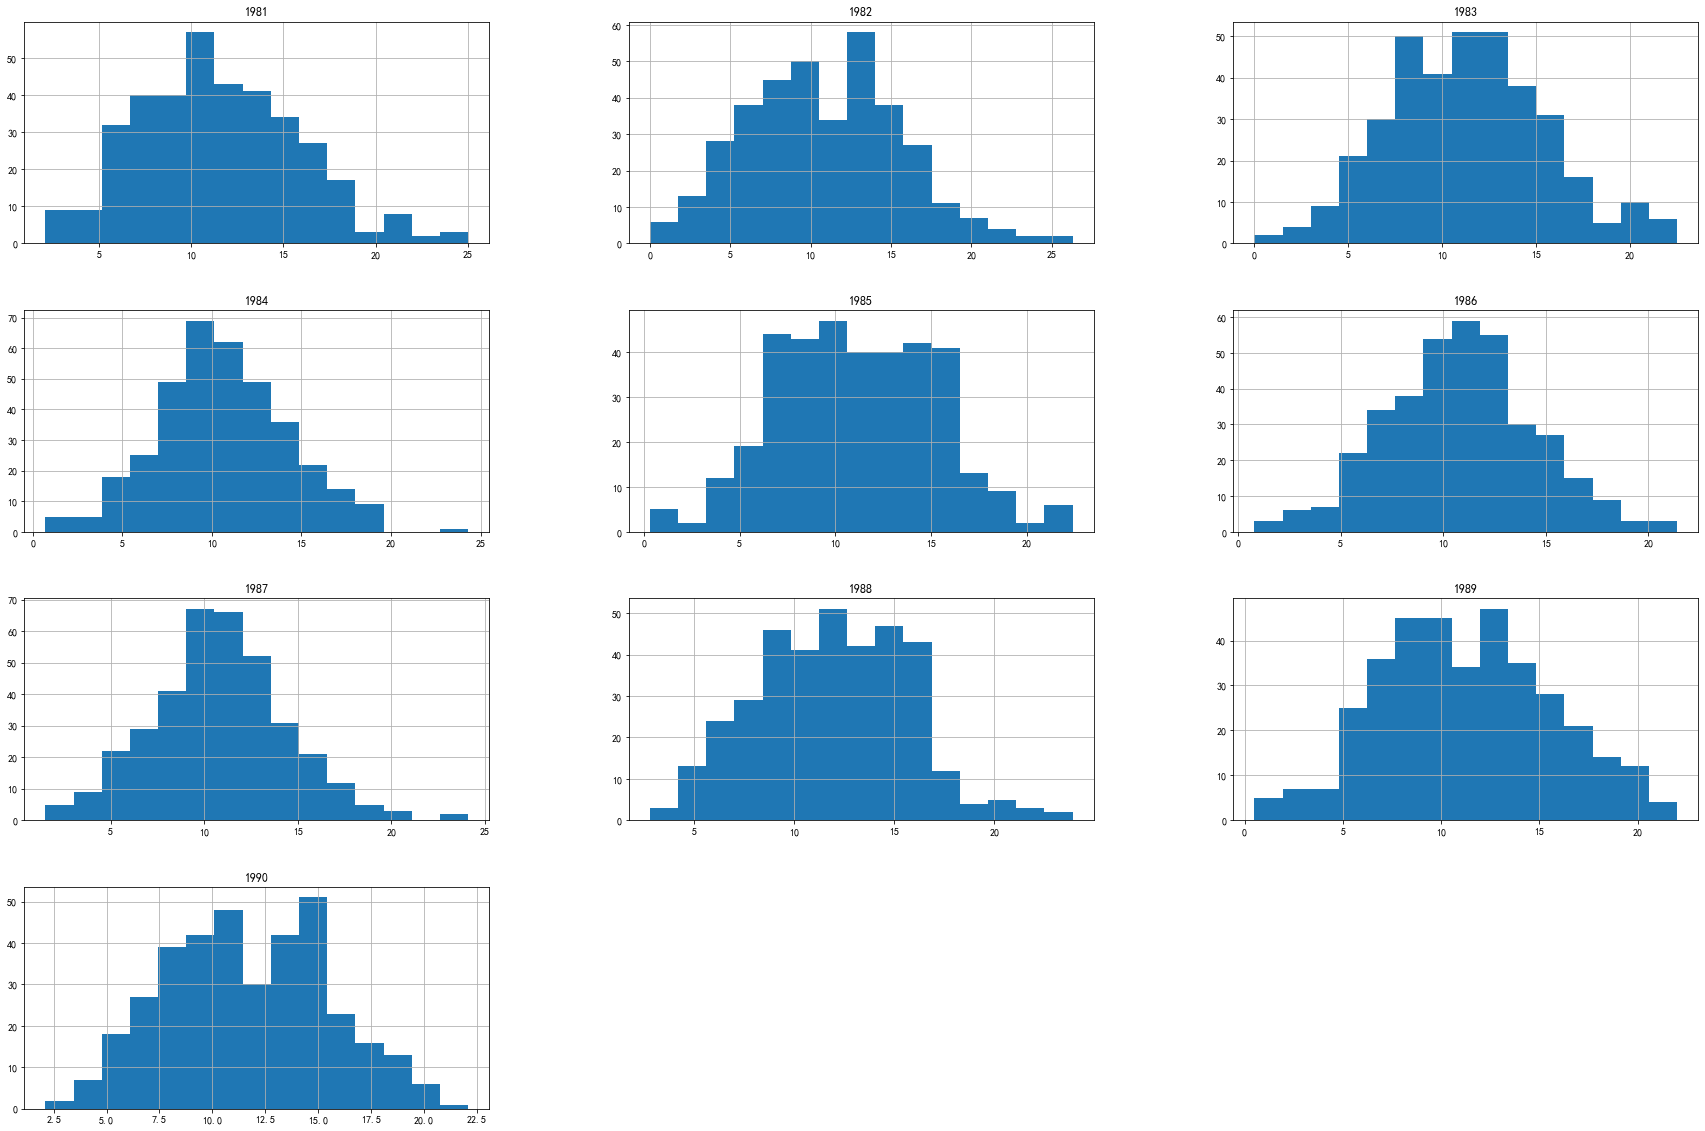

In [82]:
plt.style.use({'figure.figsize':(30,20)})
years.hist(bins=15)

In [85]:
# 选取1986年12个月每天的气温数据
groups_month=df['1986'].groupby(pd.Grouper(freq='1M'))['MinTemperature']

Text(0.5, 1.0, 'Melbourne1986 Min Temperature Box Plot')

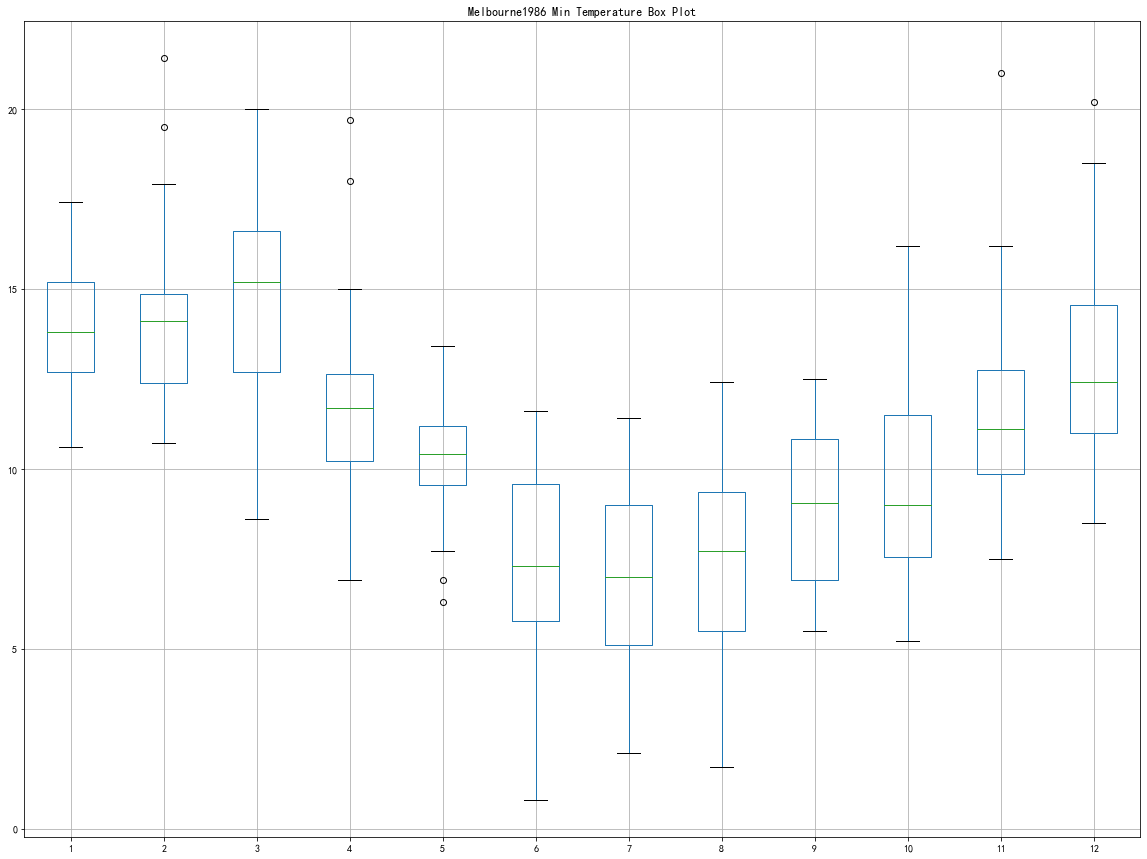

In [86]:
months = pd.concat([DataFrame(x[1].values) for x in groups_month],axis=1)
months = DataFrame(months)
months.columns = range(1,13)
months.boxplot(figsize=(20,15))
plt.title('Melbourne1986 Min Temperature Box Plot')

In [97]:
months

,1,2,3,4,5,6,7,8,9,10,11,12
0,12.9,14.6,17.7,10.2,11.1,10.9,2.8,9.3,8.3,11.0,10.8,11.0
1,13.8,14.8,13.9,10.3,9.1,4.3,8.0,9.5,10.6,16.2,10.4,14.5
2,10.6,10.7,13.3,15.0,7.7,5.2,9.8,8.5,9.1,9.9,9.1,18.5
3,12.6,11.6,14.6,18.0,10.0,11.0,11.4,10.0,11.3,8.7,16.0,15.4
4,13.7,13.6,16.4,13.8,10.4,11.6,8.6,7.7,10.9,10.5,21.0,13.1
5,12.6,14.4,16.8,10.5,8.0,10.6,5.2,9.3,8.9,12.2,16.2,16.3
6,13.1,11.8,20.0,11.8,9.8,9.4,6.6,9.1,6.3,10.6,8.6,20.2
7,15.4,15.8,12.5,7.2,12.4,10.0,5.7,3.5,9.0,8.3,9.2,11.5
8,11.9,16.0,12.7,11.6,12.9,9.6,4.6,3.6,6.1,5.5,12.5,12.4
9,13.8,11.8,11.7,7.4,12.3,9.5,5.8,2.5,9.1,9.0,9.7,10.9


#### Violin Plot

Text(0.5, 1.0, 'Melborn1986 Min Temperature Distribution - Violion Plot')

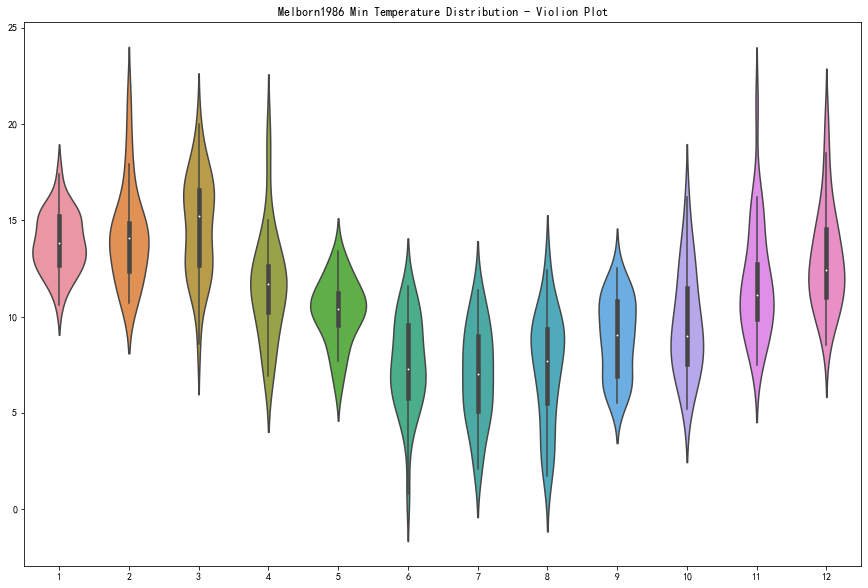

In [99]:
plt.style.use({'figure.figsize':(15,10)})
sns.violinplot(data=months)
plt.title('Melborn1986 Min Temperature Distribution - Violion Plot')

Text(0.5, 1.0, 'Melborn1986 Min Temperature Distribution - Heat Plot')

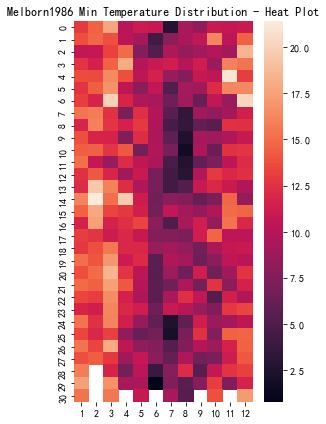

In [101]:
plt.style.use({'figure.figsize':(4,7)})
sns.heatmap(months)
plt.title('Melborn1986 Min Temperature Distribution - Heat Plot')
# 白色是数据缺失造成的 因为每个月的天数不同

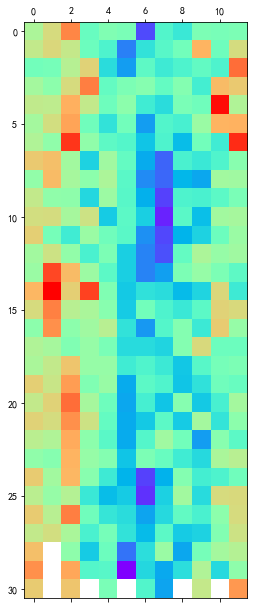

In [102]:
plt.matshow(months,interpolation=None,aspect='auto',cmap='rainbow')

#### 滞后散点图
- 时间序列分析假定一个观测值与前面的观测值之间存在一定的关系。
- 相对于某观察值之前的观察值被成为滞后值，在一个时间步长前的观察值称为滞后一期。在两个时间步长前的观测值为滞后二期，依此类推。
- 比如，对于1982年8月15日的气温数据，8月14日的气温为滞后一期，8月13日的气温为滞后二期，
- 每个观察值之间和其滞后值之间的关系可以用滞后散点图表示。

Text(0.5, 1.0, 'Melborn1986 Min Temperature Distribution - Lag Scattor Plot')

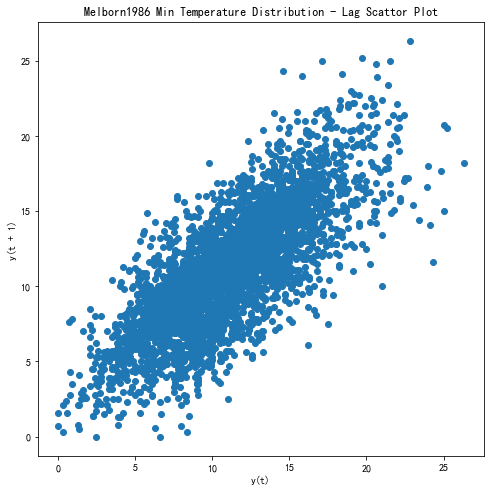

In [103]:
# 滞后一期
plt.style.use({'figure.figsize':(8,8)})

from pandas.plotting import lag_plot
lag_plot(df['MinTemperature'])
plt.title('Melborn1986 Min Temperature Distribution - Lag Scattor Plot - lag=1')

# 横轴为十年数据，纵轴为每个数据的下一个数据
# 每一个数据和它的下一个数据呈现高度相关性，则可看出明显线性图表

Text(0.5, 1.0, 'Melborn1986 Min Temperature Distribution - Lag Scattor Plot - lag=2')

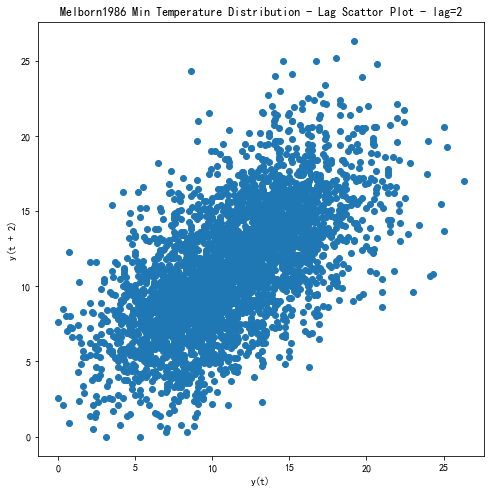

In [105]:
# 滞后二期
lag_plot(df['MinTemperature'],lag=2)
plt.title('Melborn1986 Min Temperature Distribution - Lag Scattor Plot - lag=2')

Text(0.5, 1.0, 'Melborn1986 Min Temperature Distribution - Lag Scattor Plot - lag=3')

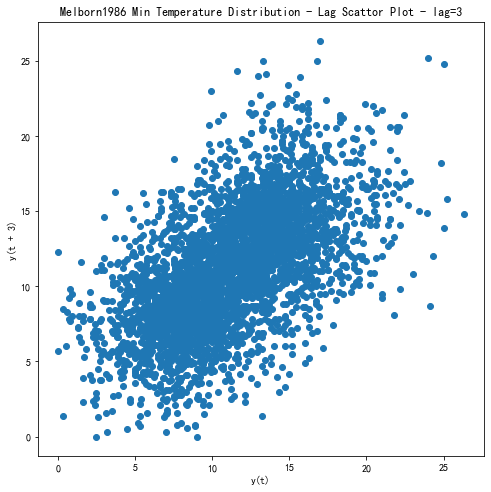

In [106]:
# 滞后三期
lag_plot(df['MinTemperature'],lag=3)
plt.title('Melborn1986 Min Temperature Distribution - Lag Scattor Plot - lag=3')

# 滞后一期比较相关，滞后三期过于松散
# 期数越多越松散

In [107]:
# pandas绘图工具库：https://pandas.pydata.org/pandas-docs/version/0.13/visualization.html

### 自相关图

([<matplotlib.axis.YTick at 0x1a2a6aad748>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

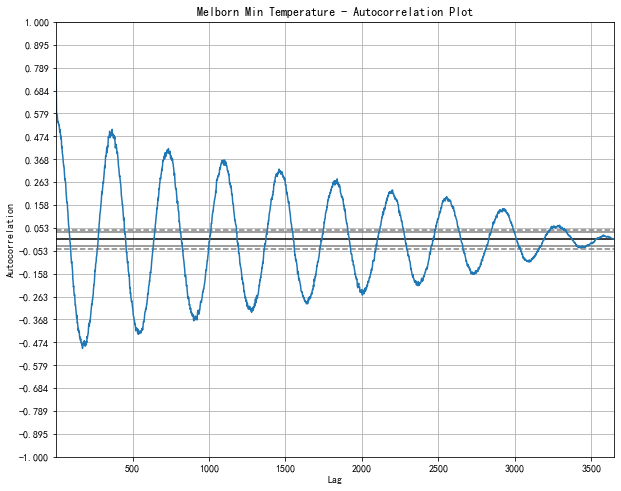

In [153]:
import numpy as np
plt.style.use({'figure.figsize':(10,8)})

from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['MinTemperature'])
plt.title('Melborn Min Temperature - Autocorrelation Plot')

plt.tick_params(labelsize=10)
plt.yticks(np.linspace(-1,1,20))  #Return evenly spaced numbers over a specified interval.

# 相关性逐渐下降，且出现周期性摆动，因为季节存在周期性变动

Text(0.5, 1.0, 'RandomNum Lag1 Scatter Plot')

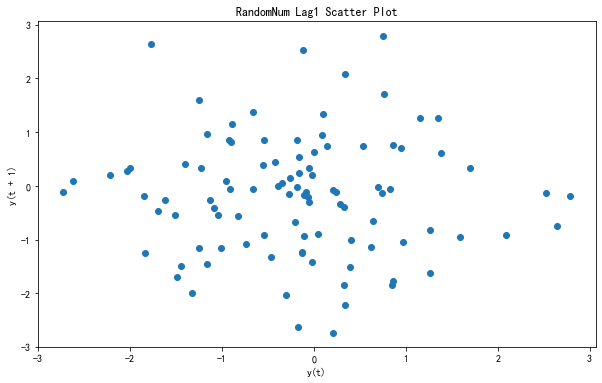

In [128]:
plt.style.use({'figure.figsize':(10,6)})
a=np.random.randn(100)
a=pd.Series(a)
lag_plot(a)
plt.title('RandomNum Lag1 Scatter Plot')

Text(0.5, 1.0, 'autocorrelation_plot')

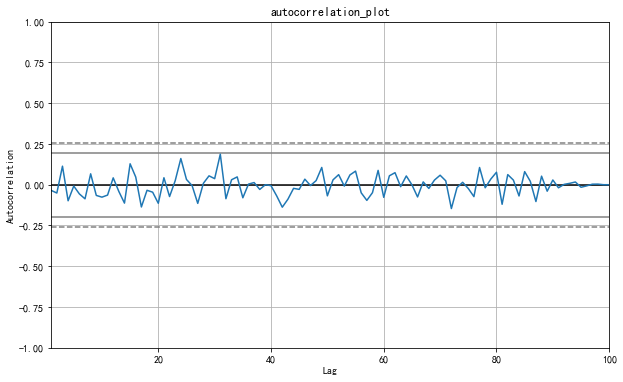

In [129]:
autocorrelation_plot(a)
plt.title('autocorrelation_plot')
# if random number, random walk